In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import math, random

In [2]:
%matplotlib inline

In [3]:
env = gym.make("CartPole-v1")

In [4]:
initial_state = env.reset(),
initial_state

(array([-0.0182929 , -0.00087211, -0.03741516, -0.0190165 ]),)

In [53]:
def step(env, action):
    state, reward, final, info = env.step(action)
    return state, reward, final, info

In [120]:
env.observation_space.shape, env.observation_space.low, env.observation_space.high

((4,),
 array([-4.80000000e+00, -3.40282347e+38, -4.18879020e-01, -3.40282347e+38]),
 array([4.80000000e+00, 3.40282347e+38, 4.18879020e-01, 3.40282347e+38]))

In [243]:
def featurize_state(state):
    return np.array([state[2], state[3], state[0]*state[2], state[0]*state[3],
                    state[2]*state[3], state[0], state[1]])

def action_space(env):
    env.action_space.low()

In [244]:
def actions(env):
    # return np.linspace(env.action_space.low, env.action_space.high, 10)
    return np.array([0, 1])

In [245]:
state = env.observation_space.sample()
state = featurize_state(state)

def init_weights():
    state = env.observation_space.sample()
    state = featurize_state(state)
    # return np.random.uniform(-1/np.sqrt(state.shape[0]),
    #                         1/np.sqrt(state.shape[0]),
    #                         (actions(env).shape[0], state.shape[0]))
    return np.zeros((actions(env).shape[0], state.shape[0]), dtype=np.float32)
weights = init_weights()

def q(state, action_idx):
    state = featurize_state(state)
    return np.dot(weights[action_idx], state)

In [246]:
num_actions = len(actions(env))
def select_action(state, greedy=0.2):
    state = featurize_state(state)
    max_arg = np.dot(weights, state).argmax()
    
    if np.random.uniform() < 1 - greedy:
        return max_arg
    else:
        return random.randint(0, num_actions-1)

In [285]:
state = env.reset()
weights = init_weights()
action = None
done = False

In [286]:
lr = learning_rate = 0.05
df = discount_factor = 0.9

episodes = []
iterations = []


for i in range(100):
    count = 0
    state = env.reset()
    done = False
    action = None
    greedy=0.2
    
    while not done:
        count += 1
        # if count >= 300: raise Exception("yay")
        if action is None:
            action = select_action(state, greedy=greedy)

        next_state, reward, done, _ = env.step(actions(env)[action])
        
        if done:
            w = weights[action]
            w = w + lr*(reward - q(state, action))*featurize_state(state)
            weights[action] = w
            break
            
        next_action = select_action(next_state, greedy=greedy)
        w = weights[action]

        w = w + lr*(reward + df*q(next_state, next_action) - q(state, action))*featurize_state(state)

        weights[action] = w

        action = next_action
        state = next_state
        # env.render()
        
    episodes.append(i)
    iterations.append(count)
    env.render()

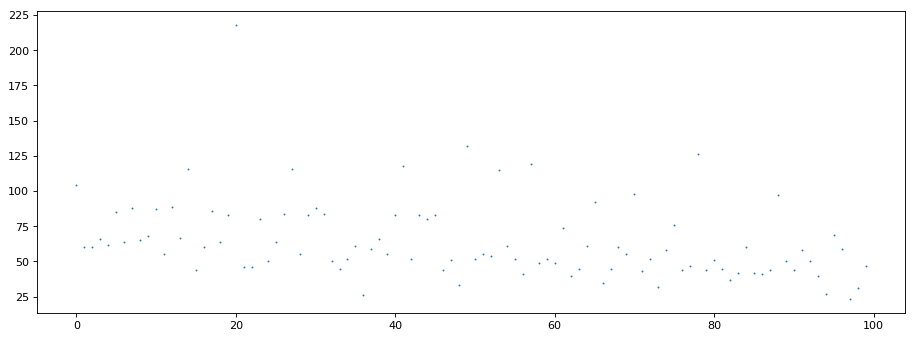

In [287]:
plt.figure(figsize=(14, 5), dpi=80)
plt.scatter(episodes, iterations, s=0.5)
#plt.hist(iterations, bins=100)
None

In [194]:
count, weights

(60, array([[ 2.0565536, -2.9715855],
        [-1.8772595,  2.7955716]], dtype=float32))

In [90]:
if False:
    np.save("weights", weights)

In [21]:
if True:
    weights = np.load("weights.npy")